In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#jupyter notebook'a özel matplotlib
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataframe'i okuyup, df'ye atayıp ilk 5 veriye bakıyoruz
df = pd.read_csv("film_list.csv")
df.head()

,title,imdb,type,year,dir_star,duration,certificate,description
0,The Shawshank Redemption,"9,3",Drama,(1994),"Director: Frank Darabont | Stars: Tim Robbins,...",142 min,R,"Over the course of several years, two convicts..."
1,The Godfather,"9,2","Crime, Drama",(1972),Director: Francis Ford Coppola | Stars: Marlon...,175 min,R,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,"9,0","Action, Crime, Drama",(2008),Director: Christopher Nolan | Stars: Christian...,152 min,PG-13,When the menace known as the Joker wreaks havo...
3,Schindler's List,"9,0","Biography, Drama, History",(1993),Director: Steven Spielberg | Stars: Liam Neeso...,195 min,R,"In German-occupied Poland during World War II,..."
4,The Godfather Part II,"9,0","Crime, Drama",(1974),Director: Francis Ford Coppola | Stars: Al Pac...,202 min,R,The early life and career of Vito Corleone in ...


In [3]:
# df hakkında bilgi alma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        994 non-null    object
 1   imdb         994 non-null    object
 2   type         994 non-null    object
 3   year         994 non-null    object
 4   dir_star     994 non-null    object
 5   duration     994 non-null    object
 6   certificate  994 non-null    object
 7   description  994 non-null    object
dtypes: object(8)
memory usage: 62.2+ KB


In [4]:
# df'nin herhangi bir kolonun boş satırları olup olmadığını kontrol
df.isna().sum()

title          0
imdb           0
type           0
year           0
dir_star       0
duration       0
certificate    0
description    0
dtype: int64

# Tüm Kolonları Tek Tek Kontrol

### Year Kolonu Düzeltme

In [5]:
df.year.head()

0    (1994)
1    (1972)
2    (2008)
3    (1993)
4    (1974)
Name: year, dtype: object

In [6]:
# year kolonundaki parantezleri yok etme
df.year = df.year.str.replace('(','')
df.year = df.year.str.replace(')','')
df.year = df.year.str.strip()

In [7]:
df.year.head()

0    1994
1    1972
2    2008
3    1993
4    1974
Name: year, dtype: object

<Axes: xlabel='count', ylabel='year'>

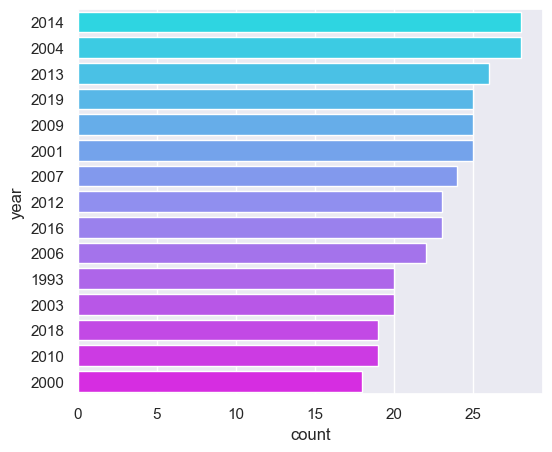

In [8]:
# en çok hangi yıllarda kaç film yapıldığını gösterim
plt.figure(figsize=(6,5))
sb.set(style="darkgrid")
sb.countplot(y="year", data= df, palette="cool", order= df['year'].value_counts().index[0:15])

### dir_star Kolonu Düzeltme

In [9]:
# dfde dir_star kolonunu director ve star kolonu olarak ayırma
df[['Director', 'Stars']] = df['dir_star'].str.split('|', 2, expand=True)

In [10]:
# Kolonlarda yarım kalan düzeltmeleri yapma
df.Director = df.Director.str.replace('Director:','')
df.Stars = df.Stars.str.replace('Stars:','')
df.Director = df.Director.str.strip()
df.Stars = df.Stars.str.strip()
df.head()

,title,imdb,type,year,dir_star,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,"9,3",Drama,1994,"Director: Frank Darabont | Stars: Tim Robbins,...",142 min,R,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,"9,2","Crime, Drama",1972,Director: Francis Ford Coppola | Stars: Marlon...,175 min,R,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,"9,0","Action, Crime, Drama",2008,Director: Christopher Nolan | Stars: Christian...,152 min,PG-13,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,Schindler's List,"9,0","Biography, Drama, History",1993,Director: Steven Spielberg | Stars: Liam Neeso...,195 min,R,"In German-occupied Poland during World War II,...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,The Godfather Part II,"9,0","Crime, Drama",1974,Director: Francis Ford Coppola | Stars: Al Pac...,202 min,R,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."


In [11]:
# Kullanılmayack dir_star kolonunu silme
df.drop(['dir_star'],axis = 1, inplace = True)
df.head()

,title,imdb,type,year,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,"9,3",Drama,1994,142 min,R,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,"9,2","Crime, Drama",1972,175 min,R,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,"9,0","Action, Crime, Drama",2008,152 min,PG-13,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,Schindler's List,"9,0","Biography, Drama, History",1993,195 min,R,"In German-occupied Poland during World War II,...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,The Godfather Part II,"9,0","Crime, Drama",1974,202 min,R,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."


In [13]:
# Kaç farklı yönetmen var
df["Director"].nunique() 

577

In [12]:
# İlk 10 en çok film yapan yönetmen gösterim
df['Director'].value_counts().head(10)

Alfred Hitchcock     12
Steven Spielberg     11
Akira Kurosawa       11
Hayao Miyazaki       10
Martin Scorsese      10
Ingmar Bergman        9
Christopher Nolan     9
Woody Allen           9
Clint Eastwood        8
Quentin Tarantino     8
Name: Director, dtype: int64

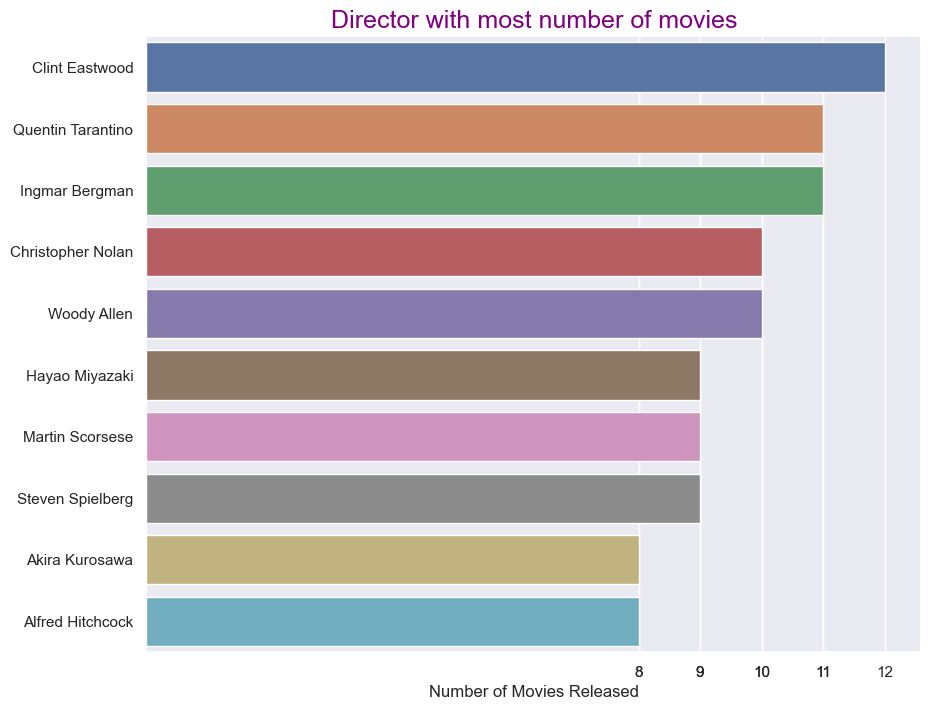

In [12]:
# İlk 10 en çok film yapan yönetmen gösterim
plt.figure(figsize=(10,8))
sb.barplot(y= df.Director.value_counts()[:10].sort_values().index, x=df.Director.value_counts()[:10].sort_values(ascending=False).values);
plt.title('Director with most number of movies', color='purple', fontsize=18)
plt.xticks(df.Director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');

### duration Kolonu Düzeltme

In [13]:
# duration kolonundan min'i silme
df.duration = df.duration.str.replace('min','')
df.duration = df.duration.str.strip()
df.head()

,title,imdb,type,year,dir_star,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,"9,3",Drama,1994,"Director: Frank Darabont | Stars: Tim Robbins,...",142,R,"Over the course of several years, two convicts...",Director: Frank Darabont,"Stars: Tim Robbins, Morgan Freeman, Bob Gunto..."
1,The Godfather,"9,2","Crime, Drama",1972,Director: Francis Ford Coppola | Stars: Marlon...,175,R,"Don Vito Corleone, head of a mafia family, dec...",Director: Francis Ford Coppola,"Stars: Marlon Brando, Al Pacino, James Caan, ..."
2,The Dark Knight,"9,0","Action, Crime, Drama",2008,Director: Christopher Nolan | Stars: Christian...,152,PG-13,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan,"Stars: Christian Bale, Heath Ledger, Aaron Ec..."
3,Schindler's List,"9,0","Biography, Drama, History",1993,Director: Steven Spielberg | Stars: Liam Neeso...,195,R,"In German-occupied Poland during World War II,...",Director: Steven Spielberg,"Stars: Liam Neeson, Ralph Fiennes, Ben Kingsl..."
4,The Godfather Part II,"9,0","Crime, Drama",1974,Director: Francis Ford Coppola | Stars: Al Pac...,202,R,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola,"Stars: Al Pacino, Robert De Niro, Robert Duva..."


In [14]:
# Object olan kolonu integer' çevirme
df['duration']=df['duration'].astype(str).astype(int)
df['duration'].head()

0    142
1    175
2    152
3    195
4    202
Name: duration, dtype: int32

<Axes: xlabel='duration', ylabel='Density'>

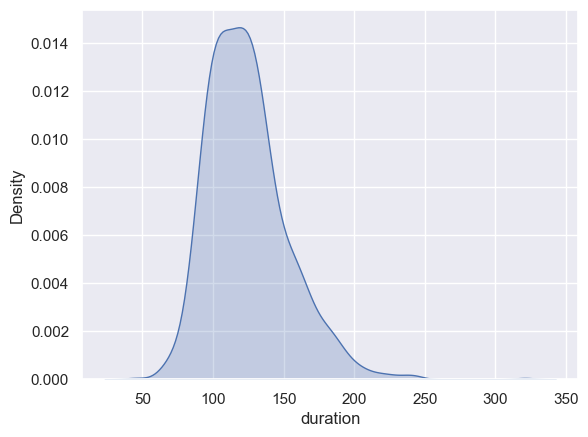

In [18]:
# Ortalama süreleri gösterme
sb.set(style="darkgrid")
sb.kdeplot(data=df['duration'], shade=True)

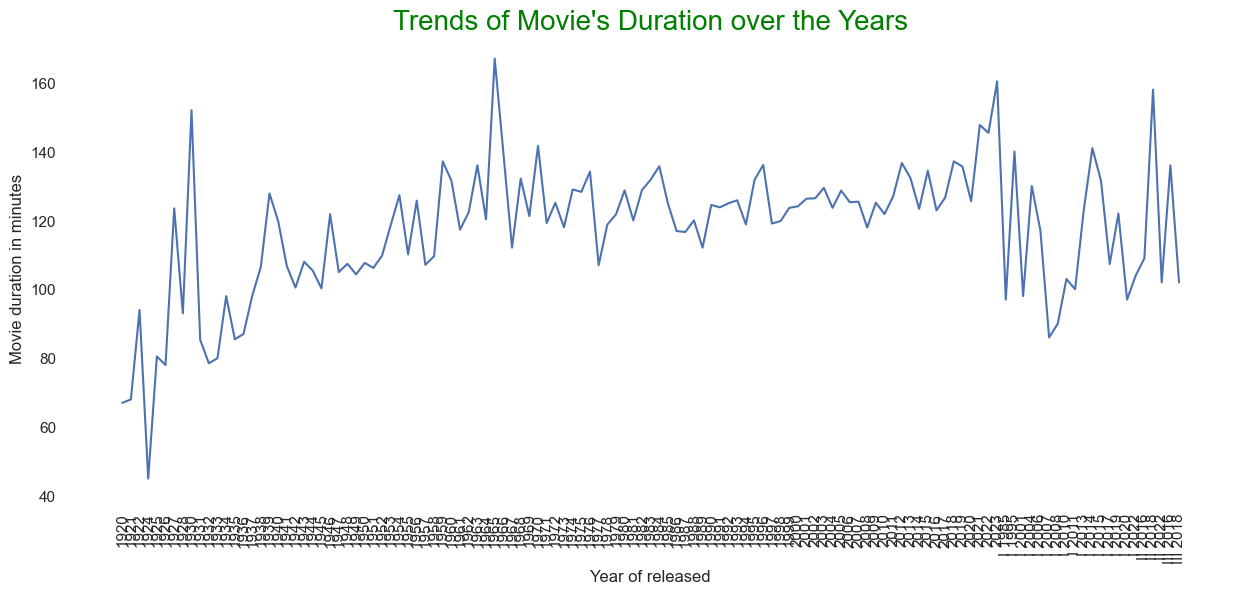

In [15]:
# Film süresinin trendleri
duration_year = df.groupby(['year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.xticks(rotation=90)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of released')
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='Green')

### type Kolonu Düzeltme

In [13]:
# type adını film camiasında kullanılan Genre'ye çeviriyorum
df = df.rename(columns={"type":"Genre"})
df.Genre.head()

0                        Drama
1                 Crime, Drama
2         Action, Crime, Drama
3    Biography, Drama, History
4                 Crime, Drama
Name: Genre, dtype: object

In [14]:
# Yazılan ilk türü alma
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])  
df['Genre'].head()

0        Drama
1        Crime
2       Action
3    Biography
4        Crime
Name: Genre, dtype: object

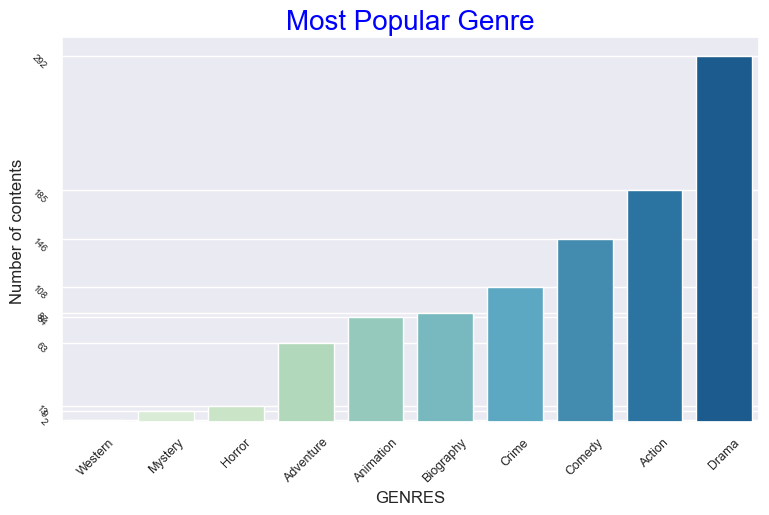

In [15]:
# En popüler türlerin grafiksel gösterimi
plt.figure(figsize=(9,5))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu')
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(rotation=-45, fontsize=7)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values)
plt.xlabel('GENRES')
plt.ylabel('Number of contents')

In [19]:
df.head()

,title,imdb,Genre,year,dir_star,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,"9,3",Drama,1994,"Director: Frank Darabont | Stars: Tim Robbins,...",142,R,"Over the course of several years, two convicts...",Director: Frank Darabont,"Stars: Tim Robbins, Morgan Freeman, Bob Gunto..."
1,The Godfather,"9,2","Crime, Drama",1972,Director: Francis Ford Coppola | Stars: Marlon...,175,R,"Don Vito Corleone, head of a mafia family, dec...",Director: Francis Ford Coppola,"Stars: Marlon Brando, Al Pacino, James Caan, ..."
2,The Dark Knight,"9,0","Action, Crime, Drama",2008,Director: Christopher Nolan | Stars: Christian...,152,PG-13,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan,"Stars: Christian Bale, Heath Ledger, Aaron Ec..."
3,Schindler's List,"9,0","Biography, Drama, History",1993,Director: Steven Spielberg | Stars: Liam Neeso...,195,R,"In German-occupied Poland during World War II,...",Director: Steven Spielberg,"Stars: Liam Neeson, Ralph Fiennes, Ben Kingsl..."
4,The Godfather Part II,"9,0","Crime, Drama",1974,Director: Francis Ford Coppola | Stars: Al Pac...,202,R,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola,"Stars: Al Pacino, Robert De Niro, Robert Duva..."


### certificate Kolonu Düzeltme

In [20]:
# Hangi certificate'den kaç tane olduğunu gösterir
df['certificate'].value_counts()

R            356
Not Rated    184
PG-13        166
PG           141
Passed        47
G             38
Approved      30
TV-MA          7
TV-PG          4
16+            3
GP             3
18+            3
TV-14          3
7+             3
13+            2
NC-17          2
M/PG           1
Unrated        1
Name: certificate, dtype: int64

<Axes: xlabel='certificate', ylabel='count'>

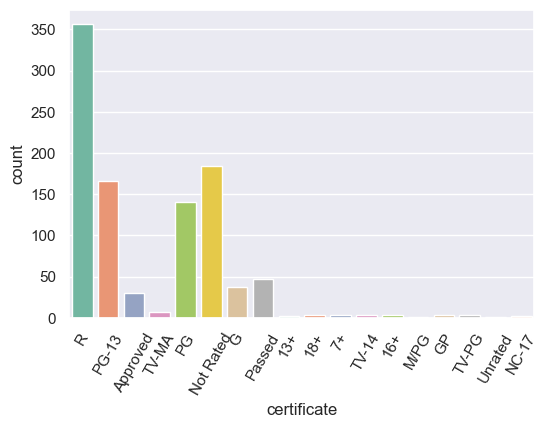

In [22]:
# certificate grafik gösterimi
plt.figure(figsize=(6, 4))
plt.xticks(rotation=60)
sb.set(style="darkgrid")
sb.countplot(x="certificate", data= df, palette="Set2")

In [23]:
df.head()

,title,imdb,Genre,year,dir_star,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,"9,3",Drama,1994,"Director: Frank Darabont | Stars: Tim Robbins,...",142,R,"Over the course of several years, two convicts...",Director: Frank Darabont,"Stars: Tim Robbins, Morgan Freeman, Bob Gunto..."
1,The Godfather,"9,2","Crime, Drama",1972,Director: Francis Ford Coppola | Stars: Marlon...,175,R,"Don Vito Corleone, head of a mafia family, dec...",Director: Francis Ford Coppola,"Stars: Marlon Brando, Al Pacino, James Caan, ..."
2,The Dark Knight,"9,0","Action, Crime, Drama",2008,Director: Christopher Nolan | Stars: Christian...,152,PG-13,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan,"Stars: Christian Bale, Heath Ledger, Aaron Ec..."
3,Schindler's List,"9,0","Biography, Drama, History",1993,Director: Steven Spielberg | Stars: Liam Neeso...,195,R,"In German-occupied Poland during World War II,...",Director: Steven Spielberg,"Stars: Liam Neeson, Ralph Fiennes, Ben Kingsl..."
4,The Godfather Part II,"9,0","Crime, Drama",1974,Director: Francis Ford Coppola | Stars: Al Pac...,202,R,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola,"Stars: Al Pacino, Robert De Niro, Robert Duva..."


### imdb Kolonu Düzeltme

In [24]:
# imdb kolonundan "," virgülü silme
df.imdb = df.imdb.str.replace(',','')
df.imdb = df.imdb.str.strip()
df.head()

,title,imdb,Genre,year,dir_star,duration,certificate,description,Director,Stars
0,The Shawshank Redemption,93,Drama,1994,"Director: Frank Darabont | Stars: Tim Robbins,...",142,R,"Over the course of several years, two convicts...",Director: Frank Darabont,"Stars: Tim Robbins, Morgan Freeman, Bob Gunto..."
1,The Godfather,92,"Crime, Drama",1972,Director: Francis Ford Coppola | Stars: Marlon...,175,R,"Don Vito Corleone, head of a mafia family, dec...",Director: Francis Ford Coppola,"Stars: Marlon Brando, Al Pacino, James Caan, ..."
2,The Dark Knight,90,"Action, Crime, Drama",2008,Director: Christopher Nolan | Stars: Christian...,152,PG-13,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan,"Stars: Christian Bale, Heath Ledger, Aaron Ec..."
3,Schindler's List,90,"Biography, Drama, History",1993,Director: Steven Spielberg | Stars: Liam Neeso...,195,R,"In German-occupied Poland during World War II,...",Director: Steven Spielberg,"Stars: Liam Neeson, Ralph Fiennes, Ben Kingsl..."
4,The Godfather Part II,90,"Crime, Drama",1974,Director: Francis Ford Coppola | Stars: Al Pac...,202,R,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola,"Stars: Al Pacino, Robert De Niro, Robert Duva..."


In [25]:
# Object olan imdb kolonunu integer'a çevirme
df['imdb']=df['imdb'].astype(str).astype(int)
df['imdb'].head()

0    93
1    92
2    90
3    90
4    90
Name: imdb, dtype: int32

### description Kolonu 

In [29]:
# description kolonunun böyle kalmasını sitediğim için değiştirmiyorum
df['description'].head()

0    Over the course of several years, two convicts...
1    Don Vito Corleone, head of a mafia family, dec...
2    When the menace known as the Joker wreaks havo...
3    In German-occupied Poland during World War II,...
4    The early life and career of Vito Corleone in ...
Name: description, dtype: object

## CSV KAYDETME

In [32]:
#Son hazırladığımız dataframe'i "last_list" adında yeni bir CSV dosyasına kaydediyoruz
df.to_csv('last_list.csv', index=False)